# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

Все материалы взяты из семинара 3-4

In [6]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn, optim
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm 
from torchvision import transforms
import PIL
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Подготовка данных

In [ ]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        # YOUR CODE
        self.x = data_dir
        self.y = transform
    
    def __getitem__(self, idx):
          return [torch.tensor(self.x[idx, :], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)]
    
    def __len__(self):
        # YOUR CODE
        return len(self.x)

In [ ]:
!unzip images.zip -d images

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/dataset/dataset/val/class_100/00000.jpg  
  inflating: images/dataset/dataset/val/class_100/00001.jpg  
  inflating: images/dataset/dataset/val/class_100/00002.jpg  
  inflating: images/dataset/dataset/val/class_100/00003.jpg  
  inflating: images/dataset/dataset/val/class_100/00004.jpg  
  inflating: images/dataset/dataset/val/class_100/00005.jpg  
  inflating: images/dataset/dataset/val/class_100/00006.jpg  
  inflating: images/dataset/dataset/val/class_100/00007.jpg  
  inflating: images/dataset/dataset/val/class_100/00008.jpg  
  inflating: images/dataset/dataset/val/class_100/00009.jpg  
  inflating: images/dataset/dataset/val/class_100/00010.jpg  
  inflating: images/dataset/dataset/val/class_100/00011.jpg  
  inflating: images/dataset/dataset/val/class_100/00012.jpg  
  inflating: images/dataset/dataset/val/class_100/00013.jpg  
  inflating: images/dataset/dataset/val/class_100/00014.jpg  
  

In [ ]:
np.random.seed(2001)
train_transform = transforms.Compose(
    [   
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = torchvision.datasets.ImageFolder("/content/images/dataset/dataset/train", transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder("/content/images/dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset 

train_dataloader =  torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=2**8,
    shuffle=True, 
    num_workers=1
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, 
    batch_size=2**8,
    shuffle=False, 
    num_workers=1
)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1231: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

In [ ]:
def plot_history(train_history, val_history, title="loss"):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label="train", zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='+', s=180, c="orange", label="val", zorder=2)
    plt.xlabel("train steps")
    
    plt.legend(loc="best")
    plt.grid()

    plt.show()

In [ ]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device,train_loss_log, train_acc_log):
    train_epoch_loss, train_epoch_true_hits = torch.empty(0), torch.empty(0)
    model.train()
    for imgs, labels in tqdm(train_dataloader):   
        imgs,labels = imgs.to(device), labels.to(device)
        y_pred = model(imgs)
        loss = criterion(y_pred, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_epoch_loss = torch.cat((train_epoch_loss, loss.unsqueeze(0).cpu() / labels.size(0)))
        train_loss_log.append(loss.data / labels.size(0))

            # log accuracy for the current epoch and the whole training history
        pred_classes = torch.argmax(y_pred, dim=-1)
        train_epoch_true_hits = torch.cat((
            train_epoch_true_hits, 
            (pred_classes == labels).sum().unsqueeze(0).cpu()
            ))
        train_acc_log.append((pred_classes == labels).cpu().sum() / labels.shape[0])

def predict(model, val_dataloader, criterion, device):
    losses, predicted_classes, true_classes = [], [], []
    model.to(device)
    model.eval()
    with torch.no_grad():
        for x,y in tqdm(val_dataloader):
            x,y = x.to(device), y.to(device)
            pred = model(x)
            loss = criterion(pred,y)
            losses.append(loss.item())
            _, pred_classes = torch.max(pred,1)
            predicted_classes.extend(pred_classes.cpu().detach().numpy())
            true_classes.extend(y.cpu().detach().numpy())
    # YOUR CODE
    # PREDICT FOR EVERY ELEMENT OF THE VAL DATALOADER AND RETURN CORRESPONDING LISTS
    return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    train_loss_log, train_acc_log, val_loss_log, val_acc_log = [], [], [], []
    model.to(device)
    for epoch in range(n_epochs):
        train_one_epoch(model, train_dataloader, criterion, optimizer, device,train_loss_log, train_acc_log)
        val_epoch_loss, val_epoch_true_hits = torch.empty(0), torch.empty(0)
        model.eval()
        with torch.no_grad():
            for imgs, labels in tqdm(val_dataloader, desc=f"Validating, epoch {epoch}", leave=False):
                imgs, labels = imgs.to(device), labels.to(device)
                
                y_pred = model(imgs)
                loss = criterion(y_pred, labels)
                val_epoch_loss = torch.cat((val_epoch_loss, loss.unsqueeze(0).cpu() / labels.size(0)))

                pred_classes = torch.argmax(y_pred, dim=-1)
                val_epoch_true_hits = torch.cat((
                    val_epoch_true_hits,
                    (pred_classes == labels).sum().unsqueeze(0).cpu()
                ))
        
        
        val_loss_log.append(val_epoch_loss.mean())
        val_acc_log.append(val_epoch_true_hits.sum() / val_epoch_true_hits.size(0) / val_dataloader.batch_size)
        plot_history(train_loss_log, val_loss_log, "loss")
        plot_history(train_acc_log, val_acc_log, "accuracy")
        print("Val loss:", val_epoch_loss.mean().item())
        print(
            "Val acc:", 
            (val_epoch_true_hits.sum() / val_epoch_true_hits.size(0) / val_dataloader.batch_size).item()
        )

### Обучение модели, запуски экспериментов

In [ ]:
class ModelBaseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = nn.Sequential(
            nn.Conv2d(3,64,3, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64,64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3, padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,3, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256,256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512,3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512,512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2,2),                       
        )
        self.fc1 = nn.Linear(4*4*512,4096)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(0.15)
        self.fc2 = nn.Linear(4096,200)
        # your code here

    def forward(self, x):
        x = self.vgg(x)
        x = nn.Flatten()(x)
        x = self.relu(self.drop(self.fc1(x)))
        x = self.fc2(x)
        return x
        # x: (batch_size; n_channels; hight; width)
        # # your code here
model_baseline = ModelBaseline()

In [ ]:
model = model_baseline
optimizer = optim.Adam(model.parameters(), lr = 0.000095)
criterion = nn.CrossEntropyLoss()# LOSS THAT YOU OPTIMIZE (SHOLD BE CROSS ENTROPY OR SMTH ELSE)
scheduler = None# LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 28 # NUMBER OF EPOCHS 

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

  0%|          | 0/40 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tests passed


Запустить обучение можно в ячейке ниже.

  0%|          | 0/391 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Validating, epoch 0:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

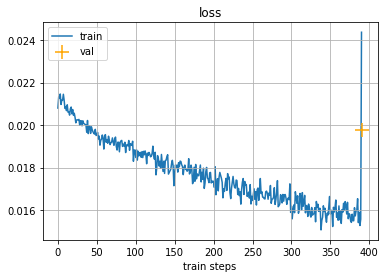

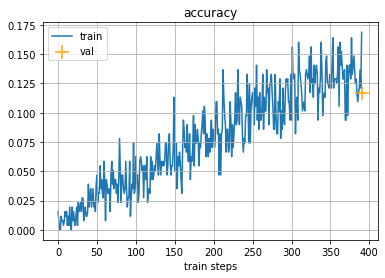

Val loss: 0.019750194624066353
Val acc: 0.11679687350988388


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 1:   0%|          | 0/40 [00:00<?, ?it/s]

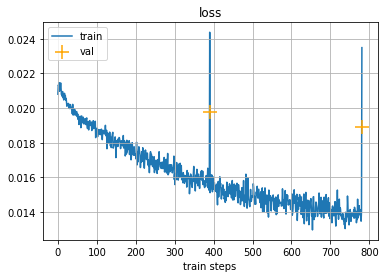

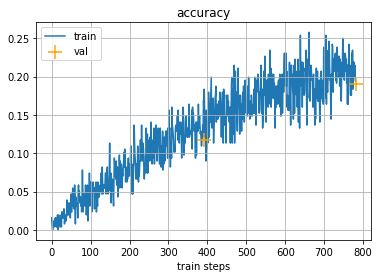

Val loss: 0.01892988011240959
Val acc: 0.19091796875


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 2:   0%|          | 0/40 [00:00<?, ?it/s]

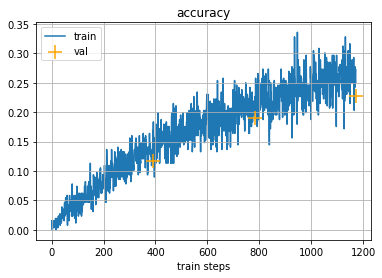

Val loss: 0.01671835221350193
Val acc: 0.22822265326976776


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 3:   0%|          | 0/40 [00:00<?, ?it/s]

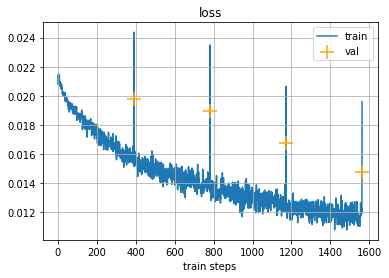

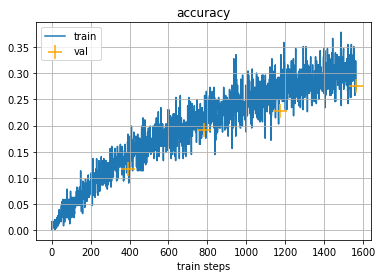

Val loss: 0.014762172475457191
Val acc: 0.2752929627895355


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 4:   0%|          | 0/40 [00:00<?, ?it/s]

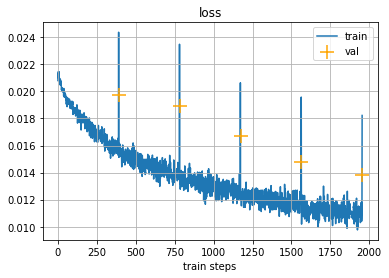

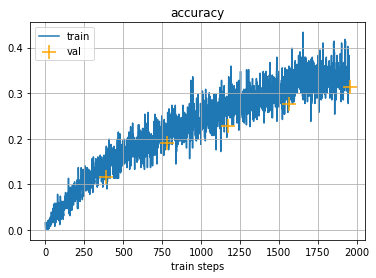

Val loss: 0.013825682923197746
Val acc: 0.31367188692092896


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 5:   0%|          | 0/40 [00:00<?, ?it/s]

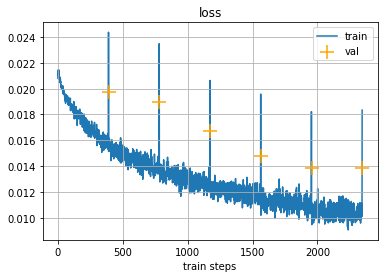

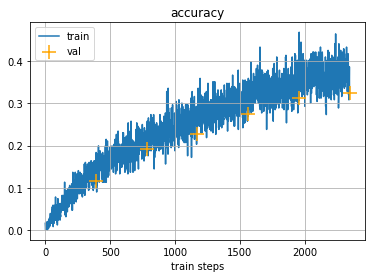

Val loss: 0.013862808234989643
Val acc: 0.32499998807907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 6:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


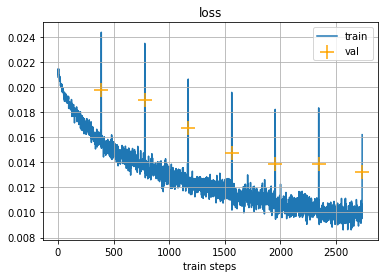

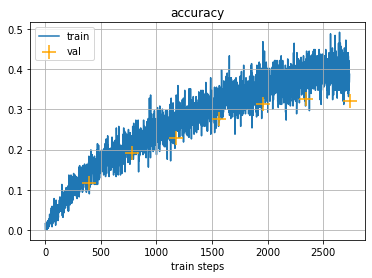

Val loss: 0.013197439722716808
Val acc: 0.32148438692092896


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 7:   0%|          | 0/40 [00:00<?, ?it/s]

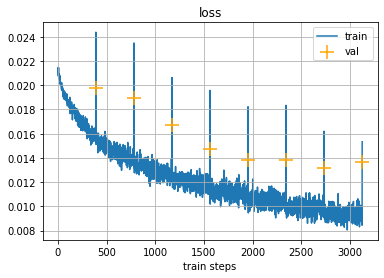

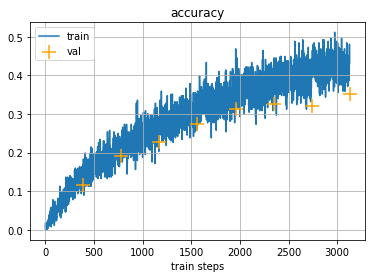

Val loss: 0.013644573278725147
Val acc: 0.3519531190395355


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 8:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


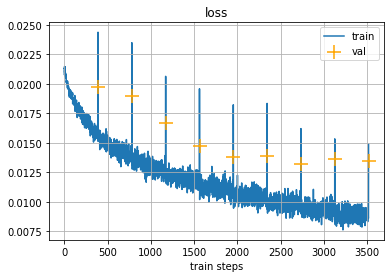

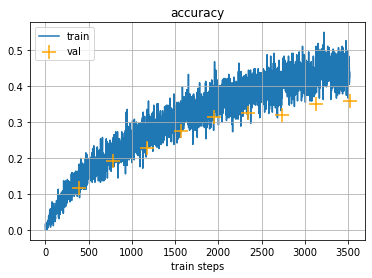

Val loss: 0.013478378765285015
Val acc: 0.36015623807907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 9:   0%|          | 0/40 [00:00<?, ?it/s]

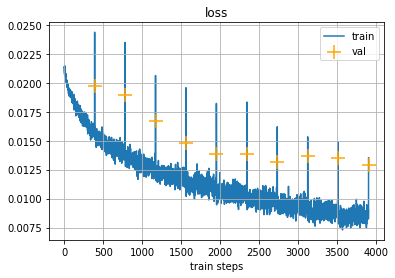

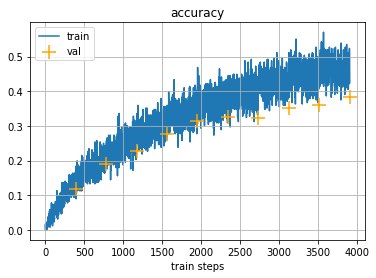

Val loss: 0.012894824147224426
Val acc: 0.3827148377895355


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 10:   0%|          | 0/40 [00:00<?, ?it/s]

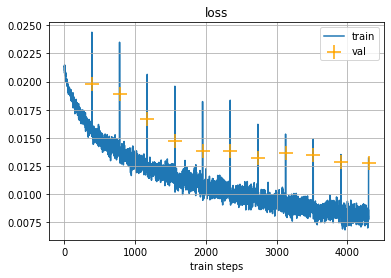

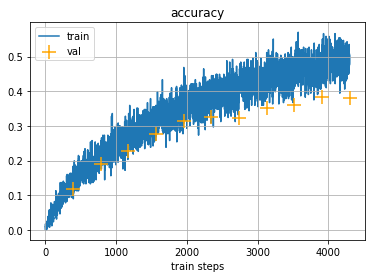

Val loss: 0.012752152979373932
Val acc: 0.37958985567092896


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 11:   0%|          | 0/40 [00:00<?, ?it/s]

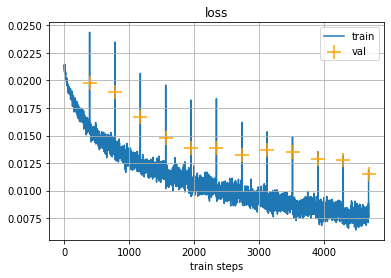

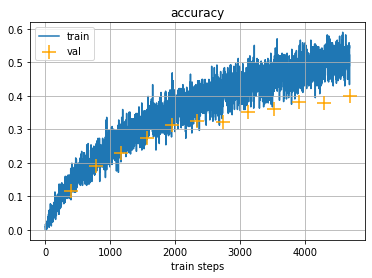

Val loss: 0.01148679293692112
Val acc: 0.39873045682907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 12:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


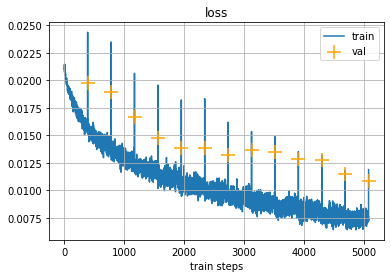

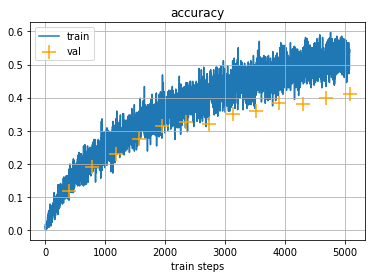

Val loss: 0.010904177092015743
Val acc: 0.41093748807907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 13:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


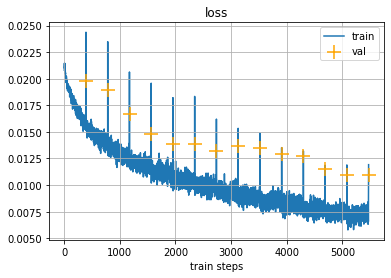

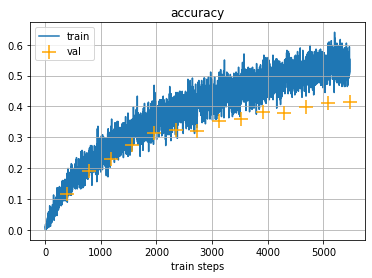

Val loss: 0.010977785103023052
Val acc: 0.4150390625


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 14:   0%|          | 0/40 [00:00<?, ?it/s]

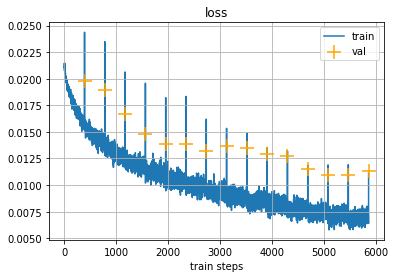

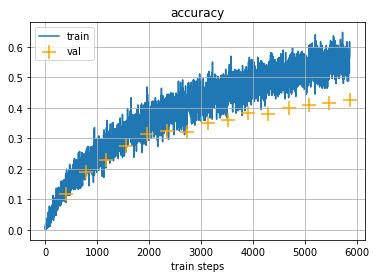

Val loss: 0.011282360181212425
Val acc: 0.4258789122104645


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 15:   0%|          | 0/40 [00:00<?, ?it/s]

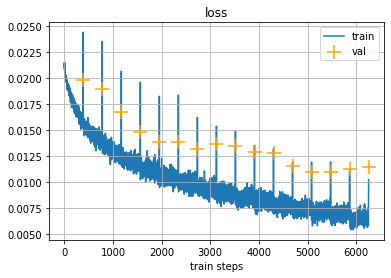

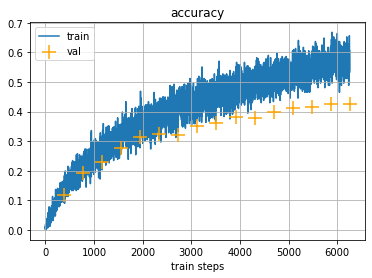

Val loss: 0.011389531195163727
Val acc: 0.42558592557907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 16:   0%|          | 0/40 [00:00<?, ?it/s]

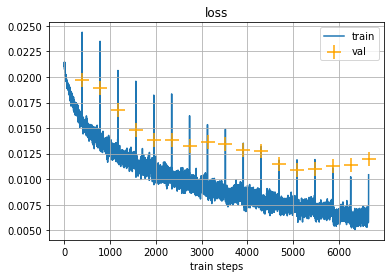

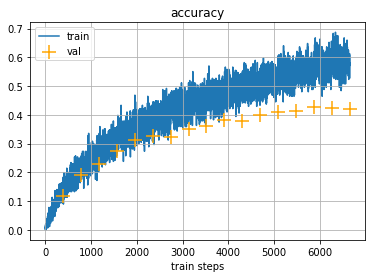

Val loss: 0.011977894231677055
Val acc: 0.4208984375


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 17:   0%|          | 0/40 [00:00<?, ?it/s]

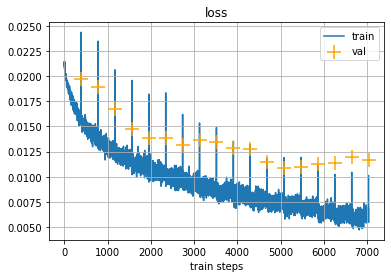

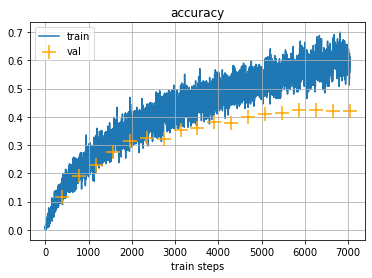

Val loss: 0.011624554172158241
Val acc: 0.4209960997104645


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 18:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


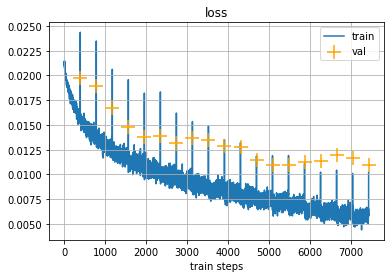

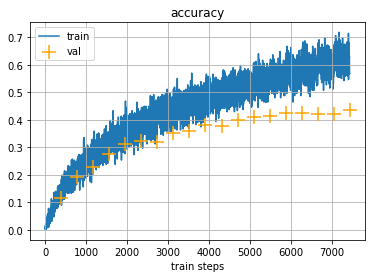

Val loss: 0.010950176045298576
Val acc: 0.43603515625


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 19:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


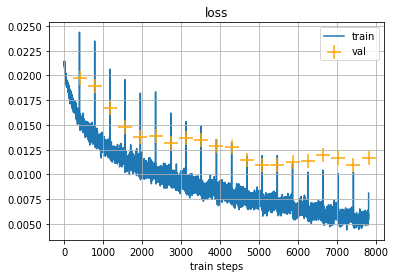

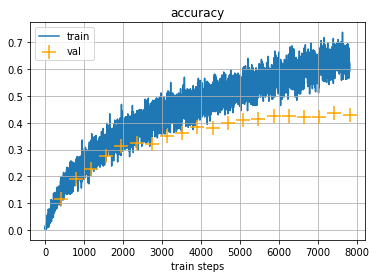

Val loss: 0.011703523807227612
Val acc: 0.42753905057907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 20:   0%|          | 0/40 [00:00<?, ?it/s]

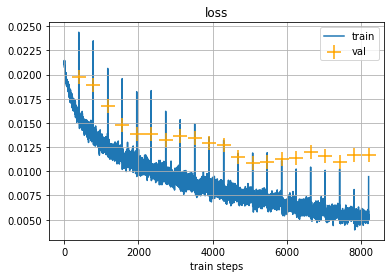

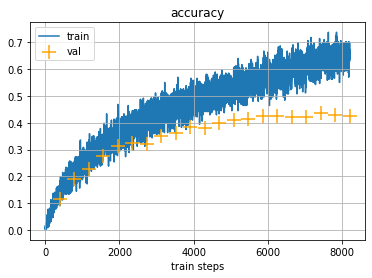

Val loss: 0.011694538407027721
Val acc: 0.42363280057907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 21:   0%|          | 0/40 [00:00<?, ?it/s]

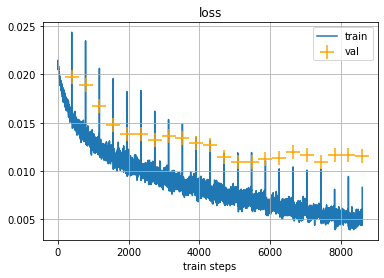

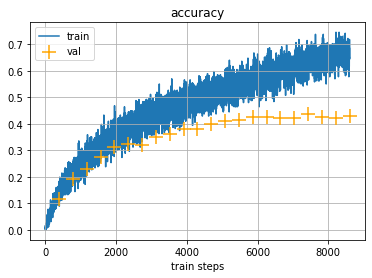

Val loss: 0.011528927832841873
Val acc: 0.42949217557907104


  0%|          | 0/391 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Validating, epoch 22:   0%|          | 0/40 [00:00<?, ?it/s]

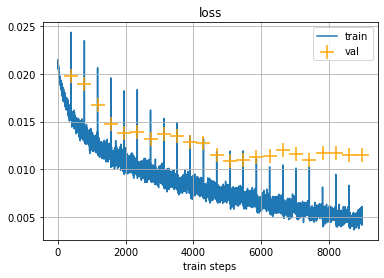

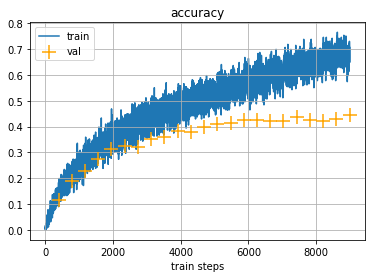

Val loss: 0.011509150266647339
Val acc: 0.4443359375


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 23:   0%|          | 0/40 [00:00<?, ?it/s]

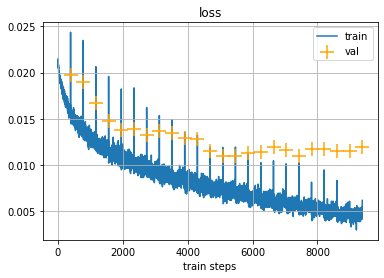

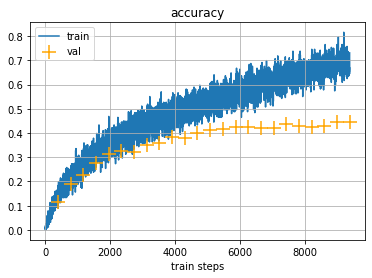

Val loss: 0.011878631077706814
Val acc: 0.44414061307907104


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 24:   0%|          | 0/40 [00:00<?, ?it/s]

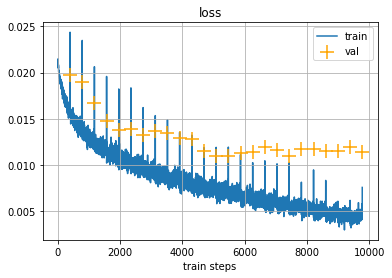

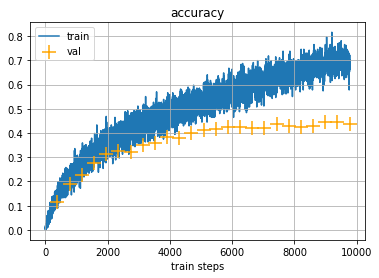

Val loss: 0.011390682309865952
Val acc: 0.43867188692092896


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 25:   0%|          | 0/40 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa1c664d0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


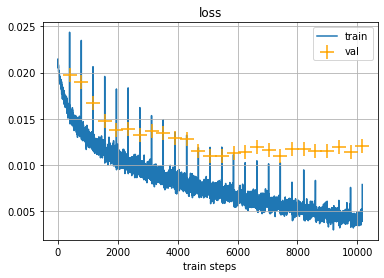

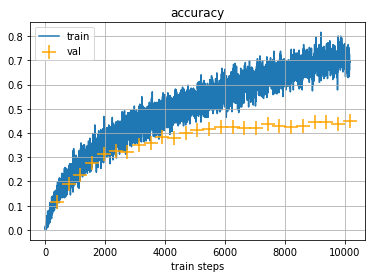

Val loss: 0.012002992443740368
Val acc: 0.4493164122104645


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 26:   0%|          | 0/40 [00:00<?, ?it/s]

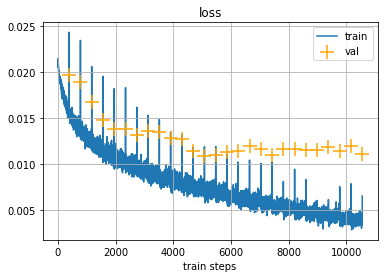

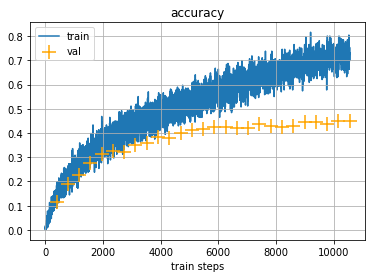

Val loss: 0.011144518852233887
Val acc: 0.4507812559604645


  0%|          | 0/391 [00:00<?, ?it/s]

Validating, epoch 27:   0%|          | 0/40 [00:00<?, ?it/s]

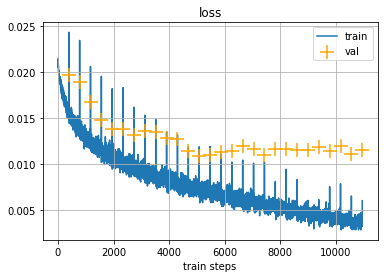

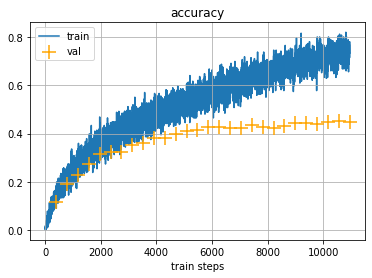

Val loss: 0.011491673067212105
Val acc: 0.4471679627895355


In [ ]:
train(model_baseline, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(10, 10 * accuracy / 0.44)))

  0%|          | 0/40 [00:00<?, ?it/s]

Оценка за это задание составит 10 баллов


In [ ]:
accuracy

0.4581

In [1]:
def evaluate(model, val_dataloader, criterion, device):
    all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
    return accuracy_score(true_labels, predicted_labels)

In [1]:
evaluate(model, val_dataloader, criterion, device)

0.4581

### Отчёт об экспериментах 

текст писать тут

Мной была выбрана архитектура модели VGG,поскольку она легко реализуема и потенциально способна достичь требуемого качества.
Проведенные эксперементы касались прежде всего шага оптимизатора. Опытным путем было установлено, что конкретно для моей модели
шаг 0.001 слишком большой, в результате чего оптимизатор проскакивал минимум и лосс на обучении составлял не ниже 0.01. При драматическом уменьшении шага в несколько ниже 0.000095 модель недообучалась, а лосс был примерно того же порядка, что при шаге 0.001. Наконец, был установлен шаг 0.000095, при котором за 26 эпох удалось добиться требуемого качества на валидации (на остальных двух наблидались колебания accuracy).
Вторым важным фактором оказалась нормализация батчей. Первая модель не содержала BatchNorm2d, поэтому обучалась медленнее.
Третьим оказался Dropout. Без регуляризации модель переобучалась на 10 - 12 эпохе, в результате чего лосс на валидации начинал 
драматически увеличиваться.
В-четвертых, необходимо было подобрать аугментации. Для начала я пробовал transforms.ColorJitter,transforms.RandomRotation(), transforms.RandomHorizontalFlip(), а также transforms.RandomCrop(). Однако, от кропа было решено позже отказаться, так как модель хуже обучалась (вероятно из-за того, что картинки из датасета сами по себе небольшие, поэтому их нарезка не дает "хорошей" дополнительной информации).


# Задание 2

In [ ]:
10*( 0.32880860567092896/0.44)

In [ ]:
from torchvision.models import resnet18

# Загрузить предобученную сеть -- pretrained=True
model = resnet18(pretrained=False)
model

In [ ]:
for param in model.parameters():
  param.requires_grad = False

In [ ]:
model.fc = nn.Linear(512,200)

In [ ]:
model = model
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad] , lr = 0.002)
criterion = nn.CrossEntropyLoss()# LOSS THAT YOU OPTIMIZE (SHOLD BE CROSS ENTROPY OR SMTH ELSE)
scheduler = None# LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 5 # NUMBER OF EPOCHS
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

In [5]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn, optim
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm 
from torchvision import transforms
import PIL
import albumentations as A
import matplotlib.pyplot as plt
# You may add any imports you need

ModuleNotFoundError: No module named 'albumentations'